Para entrar no modo apresentação, execute a seguinte célula e pressione `-`

In [1]:
%reload_ext slide

<span class="notebook-slide-start"/>

# Git

Este notebook apresenta os seguintes tópicos:

- [Git](#Git)
- [Exercício 9](#Exerc%C3%ADcio-9)
- [Pandas](#Pandas)
- [Exercício 10](#Exerc%C3%ADcio-10)

## Git

Outra fonte de informações de um repositório de software é o repositório do sistema de controle de versões.

Pelo controle de versões, conseguimos ter acesso a todos os arquivos de todas as versões, todas as mensagens de commit, branches, e colaboradores.

Nesta parte do minicurso, faremos a mineração dessas informações.

No caso do Git, ao clonar um repositório, ficamos com uma cópia local do que está lá. Portanto, começamos a mineração com um clone e não precisamos de nenhum proxy.  <span class="notebook-slide-extra" data-count="1"/>

In [2]:
!git clone https://github.com/gems-uff/sapos

Cloning into 'sapos'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 12954 (delta 4), reused 11 (delta 3), pack-reused 12932
Receiving objects: 100% (12954/12954), 10.41 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (8011/8011), done.


Com o repositório clonado, podemos usar comandos do git para extrair informações.  <span class="notebook-slide-extra" data-count="2"/>

In [3]:
%cd sapos

/home/joao/projects/tutorial/sapos


In [4]:
!git branch -r

  origin/HEAD -> origin/master
  origin/bugfixes
  origin/hotfixes
  origin/master
  origin/reports


Essas informações também podem ser obtidas para tratarmos usando variáveis do Python.

A seguir tentamos descobrir qual é o commit de cada um desses branches. <span class="notebook-slide-extra" data-count="2"/>

In [5]:
git_branch_output = !git branch -r
branches = [
    branch.strip().split(' ')[0].split('/')[1]
    for branch in git_branch_output
]
branches

['HEAD', 'bugfixes', 'hotfixes', 'master', 'reports']

In [6]:
branch_commit = {}
for branch in branches:
    __ = !git checkout $branch
    commit = !git show --pretty=format:"%h" --no-patch
    branch_commit[branch] = commit
__ = !git checkout master
branch_commit

{'HEAD': ['d3e4307'],
 'bugfixes': ['4d22176'],
 'hotfixes': ['d3e4307'],
 'master': ['d3e4307'],
 'reports': ['b294935']}

Usamos `__ = !...` para evitar a exibição do output do comando de sistema. O IPython imprime o output quando bang expressions são usadas isoladas e retorna o output quando elas são usadas em atribuições.

Note que apenas o branch `reports` está em um commit diferente.  <span class="notebook-slide-scroll" data-position="-1"/>

## Exercício 9

Faça a mesma operação para obter o código dos commits de tags e salve na variável `tag_commit`. <span class="notebook-slide-extra" data-count="1"/>

In [7]:
tags = !git tag
tag_commit = {}
for tag in tags:
    __ = !git checkout $tag
    commit = !git show --pretty=format:"%h" --no-patch
    tag_commit[tag] = commit
__ = !git checkout master
tag_commit

{'0.1.0': ['cfd4fc2'],
 '0.2.0': ['9cf8be6'],
 '0.3.0': ['336dcc3'],
 '0.3.1': ['336dcc3'],
 '1.0.0': ['8e2de97'],
 '1.0.1': ['2638fc1'],
 '1.1.0': ['bd99c54'],
 '1.1.1': ['359f61a'],
 '1.1.2': ['e702a88'],
 '1.2.0': ['f78d9b0'],
 '1.3.0': ['41edd16'],
 '1.3.1': ['7327e04'],
 '1.3.2': ['c668246'],
 '1.3.3': ['c908b61'],
 '1.3.4': ['f74e3be'],
 '1.4.0': ['77b9d24'],
 '1.4.1': ['6c7e5cf'],
 '1.4.2': ['64c40f2'],
 '1.4.3': ['3be5566'],
 '1.5.0': ['492834d'],
 '1.5.1': ['1f0bdba'],
 '1.5.2': ['1f0bdba'],
 '1.5.3': ['b6504b1'],
 '1.5.4': ['a765764'],
 '1.5.5': ['f4e006b'],
 '1.5.6': ['72522e1'],
 '1.5.7': ['2f11de1'],
 '1.5.8': ['84065cd'],
 '1.5.9': ['53f3623'],
 '1.6.0': ['576aead'],
 '1.6.1': ['6b8a35e'],
 '1.6.2': ['8a22abe'],
 '1.6.3': ['1f3c0b6'],
 '1.7.0': ['1facb9b'],
 '1.7.1': ['25c728e'],
 '1.8.0': ['a691029'],
 '1.8.1': ['f2a374d'],
 '1.8.2': ['d5b4c55'],
 '1.8.3': ['83805d1'],
 '1.8.4': ['ed1a888'],
 '1.8.5': ['df4ad8e'],
 '1.9.0': ['4db772d'],
 '1.9.1': ['ed20262'],
 '1.9.2': [

Agora vamos agrupar as tags por versões minor e ordenar as versões patch. <span class="notebook-slide-extra" data-count="1"/>

In [8]:
from itertools import groupby
groups = groupby(tags, lambda x: x.rsplit(".", 1)[0])
minor_tags = {}
for minor, elements in groups:
    minor_tags[minor] = sorted(
        elements,
        key=lambda x: int(x.split('-')[0].split('.')[-1])
    )
minor_tags['4.3']

['4.3.0',
 '4.3.1',
 '4.3.2',
 '4.3.3',
 '4.3.4',
 '4.3.5',
 '4.3.6',
 '4.3.7',
 '4.3.8',
 '4.3.9',
 '4.3.10',
 '4.3.11',
 '4.3.12',
 '4.3.13',
 '4.3.14']

Fazendo o mesmo para agrupar versões major. <span class="notebook-slide-extra" data-count="1"/>

In [9]:
groups = groupby(minor_tags, lambda x: x.rsplit(".", 1)[0])
major_tags = {}
for major, elements in groups:
    major_tags[major] = sorted(
        elements,
        key=lambda x: int(x.split('-')[0].split('.')[-1])
    )
major_tags['4']

['4.0', '4.1', '4.2', '4.3', '4.4']

Com isso, podemos escolher versões major (e.g., 3 e 4) e obter a última versão patch para cada minor delas. <span class="notebook-slide-extra" data-count="1"/>

In [10]:
last_patch_for_v3v4 = {
    minor: minor_tags[minor][-1]
    for minor in major_tags['3'] + major_tags['4']
}
last_patch_for_v3v4

{'3.0': '3.0.0',
 '3.1': '3.1.0',
 '3.2': '3.2.1',
 '3.3': '3.3.7',
 '4.0': '4.0.4',
 '4.1': '4.1.1',
 '4.2': '4.2.0',
 '4.3': '4.3.14',
 '4.4': '4.4.27'}

Agora queremos ver a evolução de linhas de código para as versões selecionadas. Para isso, vamos percorrer o dicionário fazendo checkout de cada versão, carregar o número de linhas usando `cloc` e parsear o resultado para extrair as colunas para construir linhas de uma tabela. <span class="notebook-slide-extra" data-count="1"/>

In [11]:
from collections import defaultdict
columns = {"id"}
rows = []

for minor, tag in last_patch_for_v3v4.items():
    __ = !git checkout $tag
    lines = !cloc .
    filtered_lines = lines[lines.index("-" * 79) + 3:]
    commit_result = defaultdict(int)
    commit_result["id"] = minor
    for line in filtered_lines:
        if not line.startswith("-"):
            split = line.split()
            language = split[0]
            commit_result[language + "_files"] = int(split[1])
            commit_result[language + "_blank"] = int(split[2])
            commit_result[language + "_comment"] = int(split[3])
            commit_result[language + "_code"] = int(split[4])
            columns |= {
                language + "_files", language + "_blank",
                language + "_comment", language + "_code"
            }
    rows.append(commit_result)

## Pandas
Podemos usar `pandas` para construir a tabela a partir da lista de dicionários.  <span class="notebook-slide-extra" data-count="1"/>

In [12]:
import pandas as pd
df = pd.DataFrame(rows)
df

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
0,3.0,336,1880,1362,19147,108,10891,22,15740,3,...,0.0,9.0,508,13520,1525,38849,NaN,NaN,NaN,NaN
1,3.1,336,1937,1363,19359,108,10891,22,15740,3,...,0.0,9.0,508,13582,1526,39079,NaN,NaN,NaN,NaN
2,3.2,364,2437,1385,21739,108,10891,22,15740,8,...,0.0,9.0,546,14249,1643,42458,NaN,NaN,NaN,NaN
3,3.3,396,2749,1527,23319,109,10901,22,15887,8,...,0.0,9.0,583,14604,1790,44486,NaN,NaN,NaN,NaN
4,4.0,447,2965,1653,24719,109,10903,22,15799,8,...,0.0,9.0,645,14903,1966,46478,NaN,NaN,NaN,NaN
5,4.1,449,2977,1667,24759,109,10903,22,15799,8,...,0.0,9.0,647,14917,1980,46532,NaN,NaN,NaN,NaN
6,4.2,449,2978,1667,24767,109,10903,22,15799,8,...,0.0,9.0,647,14918,1980,46540,NaN,NaN,NaN,NaN
7,4.3,505,3221,2100,25564,5,28,22,227,9,...,NaN,NaN,594,4237,2418,31506,1.0,0.0,3.0,0.0
8,4.4,508,3186,2042,25765,4,16,22,168,9,...,NaN,NaN,600,4192,2321,31740,1.0,0.0,3.0,0.0


O `pandas` permite descrever a tabela com o método `.describe()`.  <span class="notebook-slide-extra" data-count="1"/>

In [13]:
df.describe()

,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,Sass_blank,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.000000,9.000000,...,7.0,7.0,9.000000,9.000000,9.000000,9.000000,2.0,2.0,2.0,2.0
mean,421.111111,2703.333333,1640.666667,23237.555556,85.444444,8480.777778,22.0,12322.111111,7.111111,319.666667,...,0.0,9.0,586.444444,12124.666667,1905.444444,40852.000000,1.0,0.0,3.0,0.0
std,66.325795,507.187589,275.371113,2566.055587,45.894202,4795.680160,0.0,6874.179268,2.368778,23.690715,...,0.0,0.0,55.854971,4516.526874,320.371703,6016.483711,0.0,0.0,0.0,0.0
min,336.000000,1880.000000,1362.000000,19147.000000,4.000000,16.000000,22.0,168.000000,3.000000,277.000000,...,0.0,9.0,508.000000,4192.000000,1525.000000,31506.000000,1.0,0.0,3.0,0.0
25%,364.000000,2437.000000,1385.000000,21739.000000,108.000000,10891.000000,22.0,15740.000000,8.000000,315.000000,...,0.0,9.0,546.000000,13520.000000,1643.000000,38849.000000,1.0,0.0,3.0,0.0
50%,447.000000,2965.000000,1653.000000,24719.000000,108.000000,10891.000000,22.0,15740.000000,8.000000,333.000000,...,0.0,9.0,594.000000,14249.000000,1966.000000,42458.000000,1.0,0.0,3.0,0.0
75%,449.000000,2978.000000,1667.000000,24767.000000,109.000000,10903.000000,22.0,15799.000000,8.000000,334.000000,...,0.0,9.0,645.000000,14903.000000,1980.000000,46478.000000,1.0,0.0,3.0,0.0
max,508.000000,3221.000000,2100.000000,25765.000000,109.000000,10903.000000,22.0,15887.000000,9.000000,336.000000,...,0.0,9.0,647.000000,14918.000000,2418.000000,46540.000000,1.0,0.0,3.0,0.0


Além disso, é possível fazer seleções nos dados. <span class="notebook-slide-extra" data-count="1"/>

In [14]:
df[df["Ruby_code"] > 25000]

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,505,3221,2100,25564,5,28,22,227,9,...,NaN,NaN,594,4237,2418,31506,1.0,0.0,3.0,0.0
8,4.4,508,3186,2042,25765,4,16,22,168,9,...,NaN,NaN,600,4192,2321,31740,1.0,0.0,3.0,0.0


## Exercício 10

Selecione as versões que usam CoffeeScript e as versões que não usam XML. <span class="notebook-slide-extra" data-count="2"/>


In [15]:
with_coffee = df[~df["CoffeeScript_code"].isna()]
with_coffee

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,505,3221,2100,25564,5,28,22,227,9,...,NaN,NaN,594,4237,2418,31506,1.0,0.0,3.0,0.0
8,4.4,508,3186,2042,25765,4,16,22,168,9,...,NaN,NaN,600,4192,2321,31740,1.0,0.0,3.0,0.0


In [16]:
without_xml = df[df["XML_code"].isna()]
without_xml

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,...,XML_comment,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code
7,4.3,505,3221,2100,25564,5,28,22,227,9,...,NaN,NaN,594,4237,2418,31506,1.0,0.0,3.0,0.0
8,4.4,508,3186,2042,25765,4,16,22,168,9,...,NaN,NaN,600,4192,2321,31740,1.0,0.0,3.0,0.0


Além de selecionar linhas, podemos selecionar colunas. <span class="notebook-slide-extra" data-count="1"/>

In [17]:
columns = ['SUM:_files', 'SUM:_blank', 'SUM:_comment', 'SUM:_code']
ndf = df[columns]
ndf

,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code
0,508,13520,1525,38849
1,508,13582,1526,39079
2,546,14249,1643,42458
3,583,14604,1790,44486
4,645,14903,1966,46478
5,647,14917,1980,46532
6,647,14918,1980,46540
7,594,4237,2418,31506
8,600,4192,2321,31740


O `pandas` também oferece algumas funções que facilitam a geração de gráficos. <span class="notebook-slide-extra" data-count="2"/>

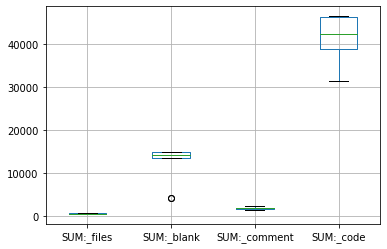

In [18]:
%matplotlib inline
ndf.boxplot()

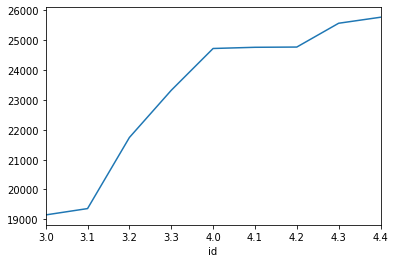

In [19]:
df.set_index("id")["Ruby_code"].plot()

É possível aplicar operações em colunas e criar novas colunas. <span class="notebook-slide-extra" data-count="1"/>

In [20]:
df.loc[:, "tag"] = df["id"].apply(lambda minor: last_patch_for_v3v4[minor])

In [21]:
df

,id,Ruby_files,Ruby_blank,Ruby_comment,Ruby_code,HTML_files,HTML_blank,HTML_comment,HTML_code,Sass_files,...,XML_code,SUM:_files,SUM:_blank,SUM:_comment,SUM:_code,CoffeeScript_files,CoffeeScript_blank,CoffeeScript_comment,CoffeeScript_code,tag
0,3.0,336,1880,1362,19147,108,10891,22,15740,3,...,9.0,508,13520,1525,38849,NaN,NaN,NaN,NaN,3.0.0
1,3.1,336,1937,1363,19359,108,10891,22,15740,3,...,9.0,508,13582,1526,39079,NaN,NaN,NaN,NaN,3.1.0
2,3.2,364,2437,1385,21739,108,10891,22,15740,8,...,9.0,546,14249,1643,42458,NaN,NaN,NaN,NaN,3.2.1
3,3.3,396,2749,1527,23319,109,10901,22,15887,8,...,9.0,583,14604,1790,44486,NaN,NaN,NaN,NaN,3.3.7
4,4.0,447,2965,1653,24719,109,10903,22,15799,8,...,9.0,645,14903,1966,46478,NaN,NaN,NaN,NaN,4.0.4
5,4.1,449,2977,1667,24759,109,10903,22,15799,8,...,9.0,647,14917,1980,46532,NaN,NaN,NaN,NaN,4.1.1
6,4.2,449,2978,1667,24767,109,10903,22,15799,8,...,9.0,647,14918,1980,46540,NaN,NaN,NaN,NaN,4.2.0
7,4.3,505,3221,2100,25564,5,28,22,227,9,...,NaN,594,4237,2418,31506,1.0,0.0,3.0,0.0,4.3.14
8,4.4,508,3186,2042,25765,4,16,22,168,9,...,NaN,600,4192,2321,31740,1.0,0.0,3.0,0.0,4.4.27


Existem muitas outras operações que podem ser vistas na documentação: https://pandas.pydata.org/pandas-docs/stable/. <span class="notebook-slide-scroll" data-position="-1"/>

Continua: [9.Pygit2.ipynb](9.Pygit2.ipynb)

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;


&nbsp;

&nbsp;

&nbsp;

